In this project, I have used bit slice plane to embed a message (here i have used my student IDs' numbers)

I have used MNIST to convert digits to thier proportionate images

In the number_to_image function, I chose images with the target label (for example, I chose all pictures with the label 9). after that I chose one of those images randomly

In [3]:
# %cd /content/drive/MyDrive/Final_Project/bit-plane

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tqdm.notebook import tqdm
import cv2
from number_to_image import number_to_image
from Filters import Filters

11490434/11490434 [==============================] - 3s 0us/step
The size of training dataset is:  (60000, 28, 28)
The size of testing dataset is:  (10000, 28, 28)


In [4]:
first_digit   = number_to_image(9).astype('uint8')
second_digit  = number_to_image(7).astype('uint8')
third_digit   = number_to_image(4).astype('uint8')
fourth_digit  = number_to_image(1).astype('uint8')
fifth_digit   = number_to_image(1).astype('uint8')
sixth_digit   = number_to_image(2).astype('uint8')
seventh_digit = number_to_image(3).astype('uint8')
eighth_digit  = number_to_image(4).astype('uint8')

digits_lst = [first_digit, second_digit, third_digit, fourth_digit, fifth_digit, sixth_digit, seventh_digit, eighth_digit]

Now we choose between several edge detector algorithem to see which one is better. 
Also we try thresholding on desire image to see the result

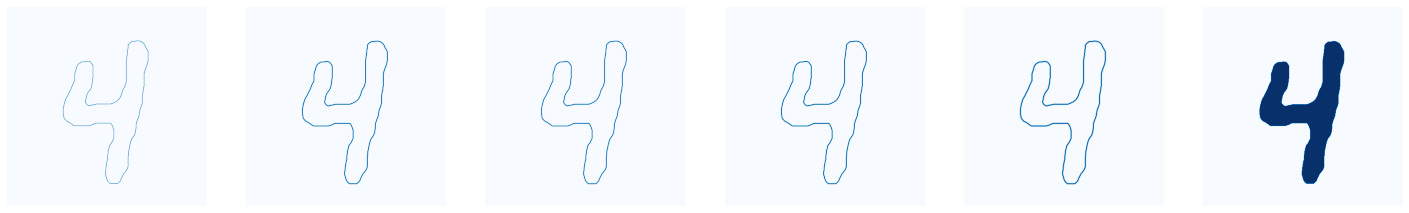

In [5]:
from skimage.filters import roberts, sobel, scharr, prewitt, farid

ret, thresh = cv2.threshold(eighth_digit, 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU)

roberts_img = roberts(thresh)
sobel_img   = sobel(thresh)
scharr_img  = scharr(thresh)
prewitt_img = prewitt(thresh)
farid_img   = farid(thresh)

lst = [roberts_img, sobel_img, scharr_img, prewitt_img, farid_img, thresh]

fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize = (25, 32))

for i in range(len(lst)):
  ax[i].imshow(lst[i], cmap = 'Blues')
  ax[i].axis('off')

An other way for edge detection is using DFT of image.
in this project, both High Pass Filter (HPF) and Low Pass Filter (LPF) were made using DFT and we continued the project using both LPF and HPF.

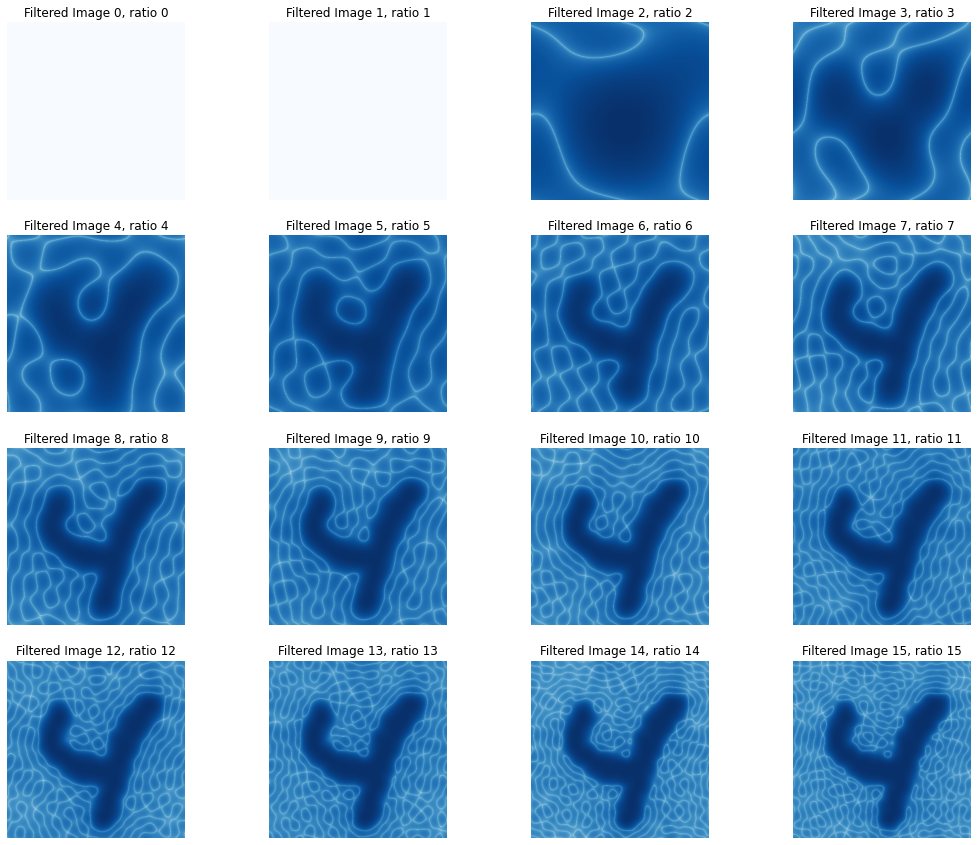

In [6]:
img = third_digit
filter = Filters(img)

filtered_img = []
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18 , 15))

for r in range(0,16):
  i = r
  filtered_img.append(filter.LPF_Filter(r))
  ax[i//4][i%4].imshow(filtered_img[i], cmap= 'Blues')
  ax[i//4][i%4].set_title(f'Filtered Image {i}, ratio {r}')
  ax[i//4][i%4].axis('off')


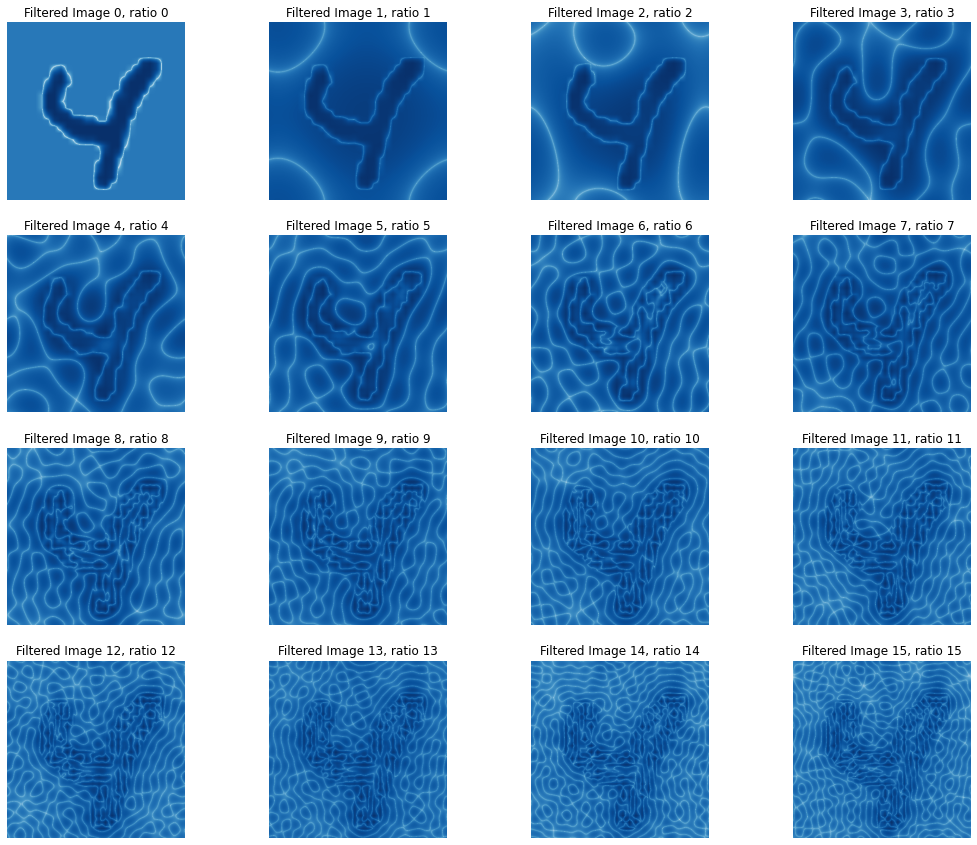

In [7]:
img = third_digit
filtered_img = []
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18 , 15))

for r in range(0,16):
  i = r
  filtered_img.append(filter.HPF_Filter(r))
  ax[i//4][i%4].imshow(filtered_img[i], cmap= 'Blues')
  ax[i//4][i%4].set_title(f'Filtered Image {i}, ratio {r}')
  ax[i//4][i%4].axis('off')


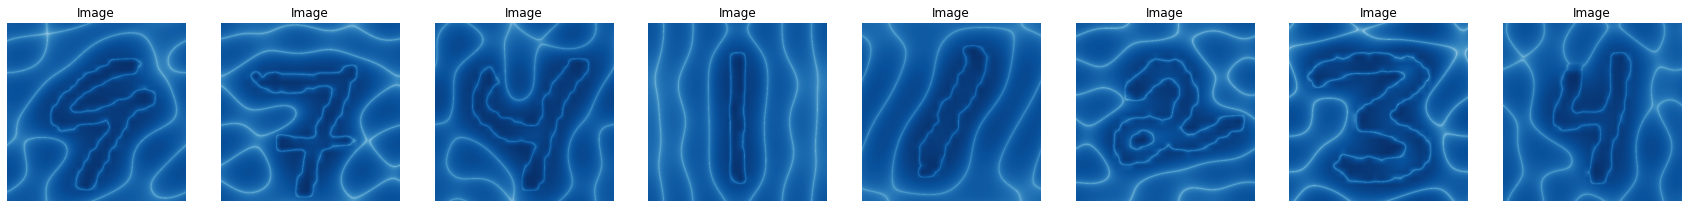

In [8]:
HPF_filtered_img = []
for img in digits_lst:
  filter = Filters(img)
  HPF_filtered_img.append(filter.HPF_Filter(r= 3))


fig, ax = plt.subplots(ncols = 8 , nrows = 1 ,figsize=(30,30))
for i in range(8):
  ax[i].imshow(HPF_filtered_img[i], cmap= 'Blues')
  ax[i].axis('off')
  ax[i].set_title(f"Image")

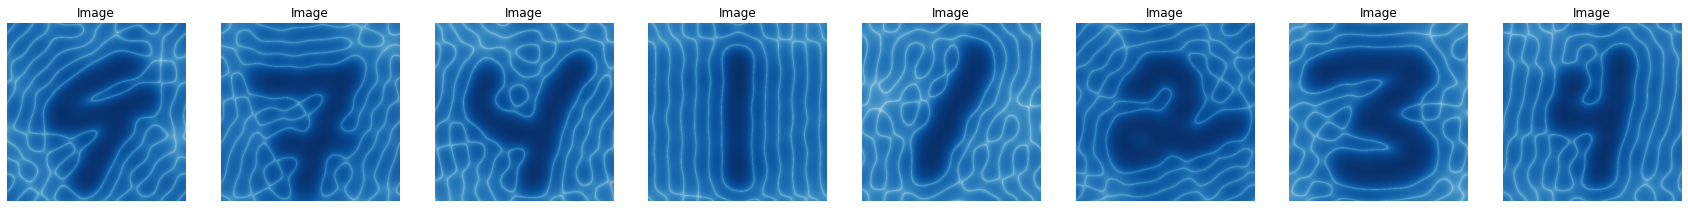

In [9]:
LPF_filtered_img = []
for img in digits_lst:
  filter = Filters(img)
  LPF_filtered_img.append(filter.LPF_Filter(r= 7))

fig, ax = plt.subplots(ncols = 8 , nrows = 1 ,figsize=(30,30))
for i in range(8):
  ax[i].imshow(LPF_filtered_img[i], cmap= 'Blues')
  ax[i].axis('off')
  ax[i].set_title(f"Image")

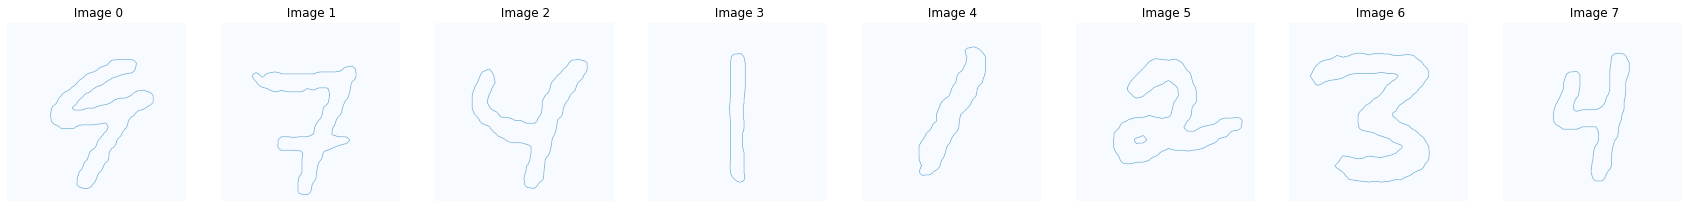

In [10]:
edg_thresh_lst = []
for img in digits_lst:
  filter = Filters(img)
  edg_thresh_lst.append(filter.edge_detector(filter.threshold(img)))


fig, ax = plt.subplots(ncols = 8 , nrows = 1 ,figsize=(30 ,30))
for i in range(8):
  ax[i].imshow(edg_thresh_lst[i], cmap= 'Blues')
  ax[i].axis('off')
  ax[i].set_title(f" Image {i}")

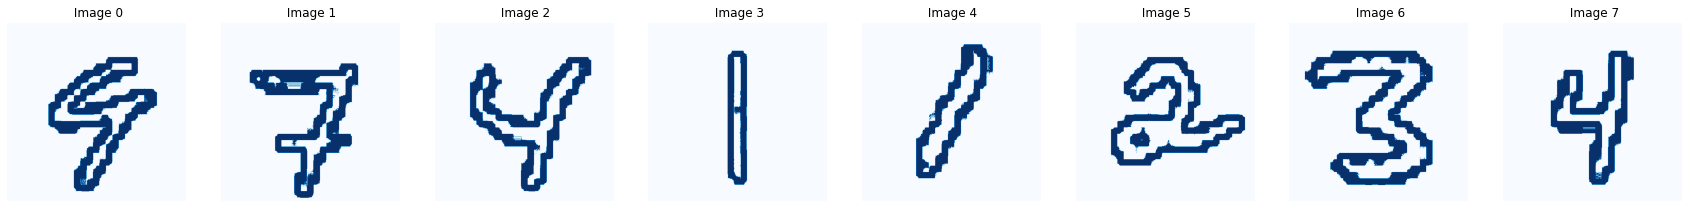

In [11]:
thresh_edg_lst = []
for img in digits_lst:
  filter = Filters(img)
  thresh_edg_lst.append(filter.threshold(filter.edge_detector(img)))


fig, ax = plt.subplots(ncols = 8 , nrows = 1 ,figsize=(30 ,30))
for i in range(8):
  ax[i].imshow(thresh_edg_lst[i], cmap= 'Blues')
  ax[i].axis('off')
  ax[i].set_title(f" Image {i}")

image 0 has pixel values [0. 1.]
image 1 has pixel values [0. 1.]
image 2 has pixel values [0. 1.]
image 3 has pixel values [0. 1.]
image 4 has pixel values [0. 1.]
image 5 has pixel values [0. 1.]
image 6 has pixel values [0. 1.]
image 7 has pixel values [0. 1.]


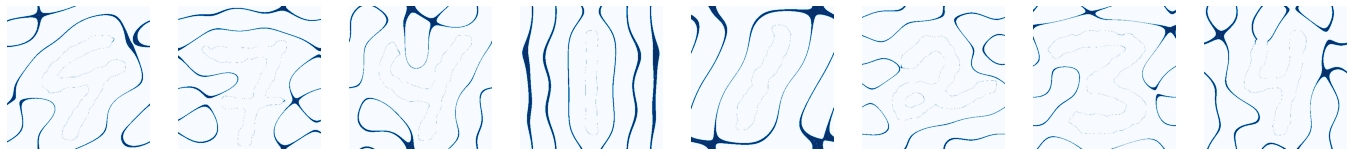

In [12]:
segmented_images_HPF = []
fig, ax = plt.subplots(ncols = 8 , nrows = 1 ,figsize=(24 ,24))
for i in range(len(HPF_filtered_img)):
  filter = Filters(HPF_filtered_img[i])
  img = (filter.threshold((HPF_filtered_img[i]).astype("uint8")))
  img = img/255  
  # img = digits_lst[i]
  segmented_images_HPF.append(img)
  # print(f'edge detected at index{i}')
  ax[i].imshow(segmented_images_HPF[i],cmap = 'Blues')
  ax[i].axis('off')
  print(f'image {i} has pixel values {np.unique(segmented_images_HPF[i])}')

image 0 has pixel values [0. 1.]
image 1 has pixel values [0. 1.]
image 2 has pixel values [0. 1.]
image 3 has pixel values [0. 1.]
image 4 has pixel values [0. 1.]
image 5 has pixel values [0. 1.]
image 6 has pixel values [0. 1.]
image 7 has pixel values [0. 1.]


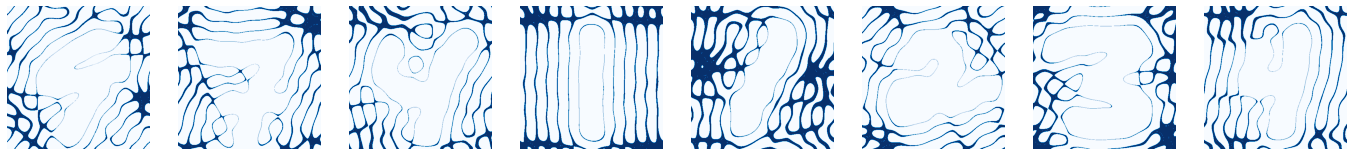

In [13]:
segmented_images_LPF = []
fig, ax = plt.subplots(ncols = 8 , nrows = 1 ,figsize=(24 ,24))
for i in range(len(LPF_filtered_img)):
  filter = Filters(LPF_filtered_img[i])
  img = (filter.threshold((LPF_filtered_img[i]).astype("uint8")))
  img = img/255  
  # img = digits_lst[i]
  segmented_images_LPF.append(img)
  # print(f'edge detected at index{i}')
  ax[i].imshow(segmented_images_LPF[i],cmap = 'Blues')
  ax[i].axis('off')
  print(f'image {i} has pixel values {np.unique(segmented_images_LPF[i])}')

Now I need to multiple each image by 2^n ( 0<n<8).
Finally, those images should add up to each other  

(-0.5, 449.5, 449.5, -0.5)

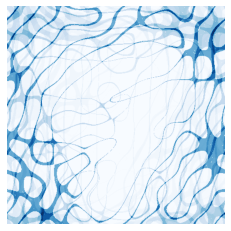

In [14]:
plane_1 = segmented_images_LPF[0]*128 #checker_board(first_digit.shape[0])
plane_2 = segmented_images_LPF[1]*64
plane_3 = segmented_images_LPF[2]*32
plane_4 = segmented_images_LPF[3]*16
plane_5 = segmented_images_LPF[4]*8
plane_6 = segmented_images_LPF[5]*4
plane_7 = segmented_images_LPF[6]*2
plane_8 = segmented_images_LPF[7]*1

main_img_LPF = plane_1 + plane_2 + plane_3 + plane_4 + plane_5 + plane_6 + plane_7 + plane_8
main_img_LPF = main_img_LPF.astype('uint64')
main_img_LPF.max()

plt.imshow(main_img_LPF.astype('uint64'),cmap = 'Blues')
plt.axis('off')

(-0.5, 449.5, 449.5, -0.5)

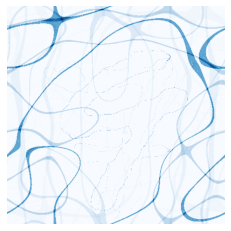

In [15]:
plane_1 = segmented_images_HPF[0]*128 #checker_board(first_digit.shape[0])
plane_2 = segmented_images_HPF[1]*64
plane_3 = segmented_images_HPF[2]*32
plane_4 = segmented_images_HPF[3]*16
plane_5 = segmented_images_HPF[4]*8
plane_6 = segmented_images_HPF[5]*4
plane_7 = segmented_images_HPF[6]*2
plane_8 = segmented_images_HPF[7]*1

main_img_HPF = plane_1 + plane_2 + plane_3 + plane_4 + plane_5 + plane_6 + plane_7 + plane_8
main_img_HPF = main_img_HPF.astype('uint64')

plt.imshow(main_img_HPF.astype('uint64'),cmap = 'Blues')
plt.axis('off')

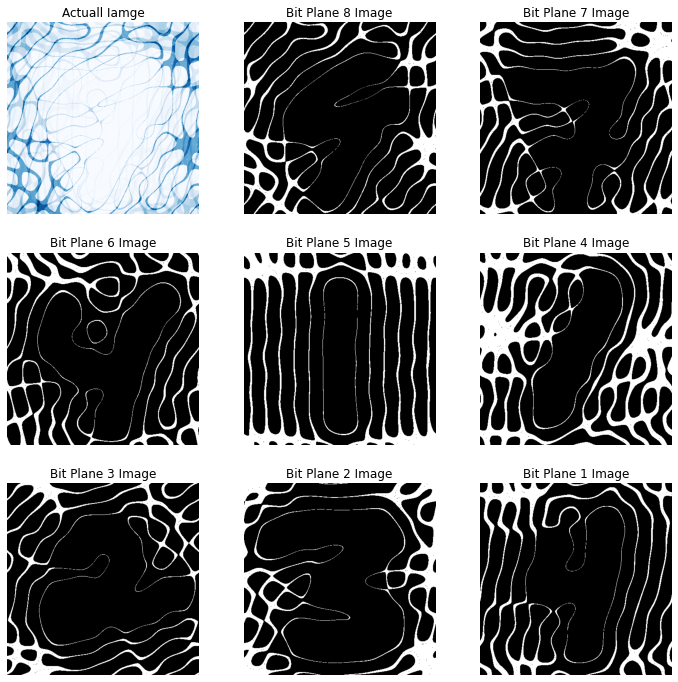

In [16]:
lst_LPF = []
for i in range(main_img_LPF.shape[0]):
  for j in range(main_img_LPF.shape[1]):
    lst_LPF.append(np.binary_repr(main_img_LPF[i][j] , width=8))

eight_bit = (np.array([np.bitwise_and(int(i, 2) , 128) for i in lst_LPF])).reshape(main_img_LPF.shape[0] , main_img_LPF.shape[1])
seven_bit = (np.array([np.bitwise_and(int(i, 2) , 64)  for i in lst_LPF])).reshape(main_img_LPF.shape[0] , main_img_LPF.shape[1])
six_bit   = (np.array([np.bitwise_and(int(i, 2) , 32)  for i in lst_LPF])).reshape(main_img_LPF.shape[0] , main_img_LPF.shape[1])
five_bit  = (np.array([np.bitwise_and(int(i, 2) , 16)  for i in lst_LPF])).reshape(main_img_LPF.shape[0] , main_img_LPF.shape[1])
four_bit  = (np.array([np.bitwise_and(int(i, 2) , 8)   for i in lst_LPF])).reshape(main_img_LPF.shape[0] , main_img_LPF.shape[1])
three_bit = (np.array([np.bitwise_and(int(i, 2) , 4)   for i in lst_LPF])).reshape(main_img_LPF.shape[0] , main_img_LPF.shape[1])
two_bit   = (np.array([np.bitwise_and(int(i, 2) , 2)   for i in lst_LPF])).reshape(main_img_LPF.shape[0] , main_img_LPF.shape[1])
one_bit   = (np.array([np.bitwise_and(int(i, 2) , 1)   for i in lst_LPF])).reshape(main_img_LPF.shape[0] , main_img_LPF.shape[1])

img_lst_r = [main_img_LPF, eight_bit, seven_bit, six_bit ,five_bit , four_bit, three_bit ,two_bit , one_bit]
fig, ax = plt.subplots(ncols = 3 , nrows = 3 ,figsize=(12 ,12))
for i in range(9):
  if (i != 0):
    ax[i//3][i%3].imshow(img_lst_r[i],cmap = 'gist_gray')
    ax[i//3][i%3].set_title(f"Bit Plane {9 - i} Image")
  if (i == 0):
    ax[i//3][i%3].set_title("Actuall Iamge")
    ax[i//3][i%3].imshow(img_lst_r[i],cmap = 'Blues')

  ax[i//3][i%3].axis('off')

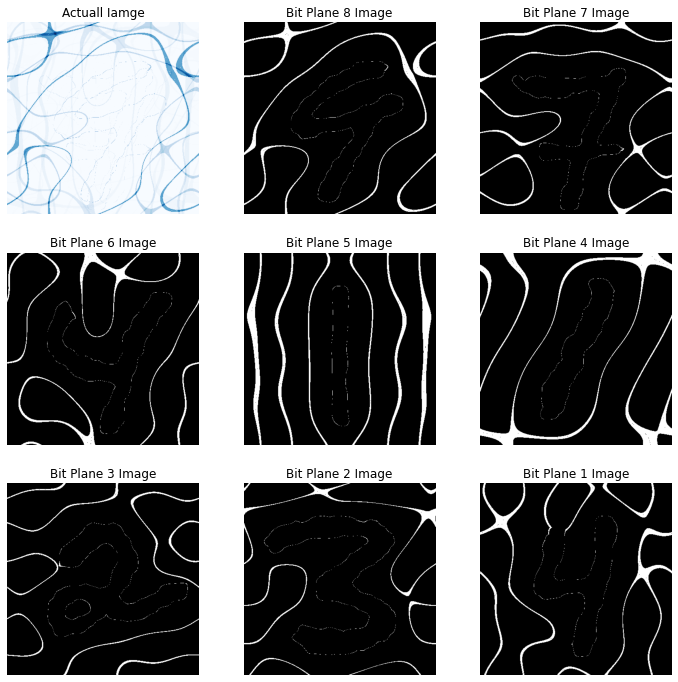

In [17]:
lst_HPF = []
for i in range(main_img_HPF.shape[0]):
  for j in range(main_img_HPF.shape[1]):
    lst_HPF.append(np.binary_repr(main_img_HPF[i][j] , width=8))
    
eight_bit = (np.array([np.bitwise_and(int(i, 2) , 128) for i in lst_HPF])).reshape(main_img_HPF.shape[0] , main_img_HPF.shape[1])
seven_bit = (np.array([np.bitwise_and(int(i, 2) , 64)  for i in lst_HPF])).reshape(main_img_HPF.shape[0] , main_img_HPF.shape[1])
six_bit   = (np.array([np.bitwise_and(int(i, 2) , 32)  for i in lst_HPF])).reshape(main_img_HPF.shape[0] , main_img_HPF.shape[1])
five_bit  = (np.array([np.bitwise_and(int(i, 2) , 16)  for i in lst_HPF])).reshape(main_img_HPF.shape[0] , main_img_HPF.shape[1])
four_bit  = (np.array([np.bitwise_and(int(i, 2) , 8)   for i in lst_HPF])).reshape(main_img_HPF.shape[0] , main_img_HPF.shape[1])
three_bit = (np.array([np.bitwise_and(int(i, 2) , 4)   for i in lst_HPF])).reshape(main_img_HPF.shape[0] , main_img_HPF.shape[1])
two_bit   = (np.array([np.bitwise_and(int(i, 2) , 2)   for i in lst_HPF])).reshape(main_img_HPF.shape[0] , main_img_HPF.shape[1])
one_bit   = (np.array([np.bitwise_and(int(i, 2) , 1)   for i in lst_HPF])).reshape(main_img_HPF.shape[0] , main_img_HPF.shape[1])

img_lst_r = [main_img_HPF, eight_bit, seven_bit, six_bit ,five_bit , four_bit, three_bit ,two_bit , one_bit]
fig, ax = plt.subplots(ncols = 3 , nrows = 3 ,figsize=(12 ,12))
for i in range(9):  
  if (i != 0):
    ax[i//3][i%3].imshow(img_lst_r[i], cmap= 'gray')
    ax[i//3][i%3].set_title(f"Bit Plane {9 - i} Image")

  if (i == 0):
    ax[i//3][i%3].imshow(img_lst_r[i], cmap= 'Blues')
    ax[i//3][i%3].set_title("Actuall Iamge")

  ax[i//3][i%3].axis('off')